### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

First let's take a look at missing data for each column using isnull().  This will let us know where data is missing.
We can then decide on how to handle anything missing.

In [27]:
# Count the nulls and NaNs
print(data.isnull().sum())

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Correct passenger column name
data = data.rename(columns={'passanger': 'passenger'})

# Since there is so much missing from the car column.  Let's get rid of it.
data.drop("car", axis=1, inplace=True)

# Bar has some missing data.  There are very few so let's just put never in the missing rows.
data['Bar'] = data['Bar'].fillna("never")

# Coffeehouse has the same issue.  Replace the nulls with never.
data['CoffeeHouse'] = data['CoffeeHouse'].fillna("never")

# The CarryAway column missing data will be filled with never.
data['CarryAway'] = data['CarryAway'].fillna("never")

# Restaurant less than 20 missing data will be filled in with never.
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna("never")

# Restaurant 20-50 missing data will be filled with never
data['Restaurant20To50'] = data['Restaurant20To50'].fillna("never")


4. What proportion of the total observations chose to accept the coupon?



In [7]:
proportion_accepted = data['Y'].sum() / data['Y'].size
print('Proportion of people that accepted the coupon: ' + str(proportion_accepted))

Proportion of people that accepted the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Bar Plot of Coupon Data')

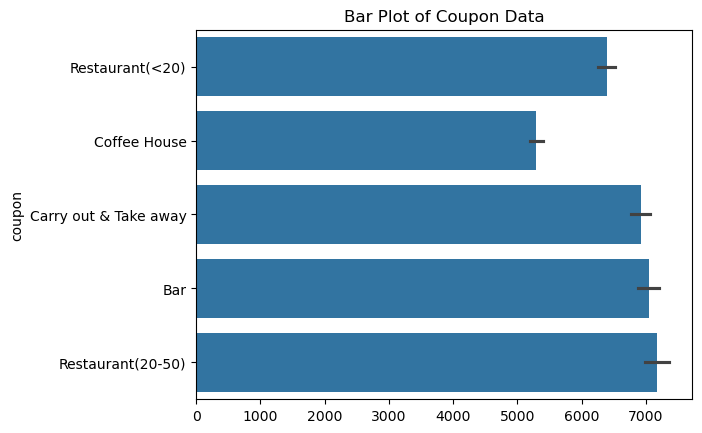

In [8]:
plt = sns.barplot(data['coupon'])
plt.set_title("Bar Plot of Coupon Data")

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

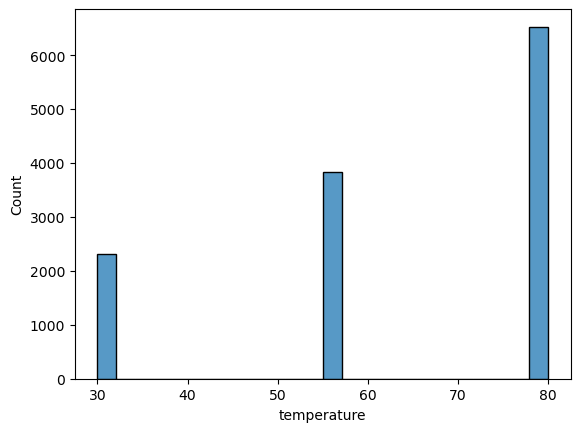

In [9]:
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_df = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [11]:
prop_bar_accepted = bar_df["Y"].sum() / data['Y'].size
print('Proportion of bar coupons accepted: ' + str(prop_bar_accepted))

Proportion of bar coupons accepted: 0.065200252286345


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
less_than_3 = ['never', 'less1', '1~3']
more_than_3 = ['4~8', 'gt8']
prop_bar_lt3 = bar_df.query('Bar in @less_than_3')['Y'].sum() / bar_df['Y'].size
prop_bar_gt3 = bar_df.query('Bar in @more_than_3')['Y'].sum() / bar_df['Y'].size

print('People that went to bars less than 3 times a month accepted at: ' + str(prop_bar_lt3) + ' where people that went more accepted at: ' + str(prop_bar_gt3))

People that went to bars less than 3 times a month accepted at: 0.3341596430342092 where people that went more accepted at: 0.07585523054040655


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
more_than_1 = ['1~3', '4~8', 'gt8']
less_than_25 = ['below21', '21']

prop_over_25_more_bar_visits = bar_df.query('(Bar in @more_than_1) and (age not in @less_than_25)')['Y'].sum() / bar_df['Y'].size
prop_others = bar_df['Y'].sum() / bar_df['Y'].size - prop_over_25_more_bar_visits

print('Over 25 and more than 1 bar visit rate: ' + str(prop_over_25_more_bar_visits) + " Everyone else's rate: " + str(prop_others))

# There is a difference between the acceptance rate.  The over 25 and more than 1 bar visit group accepted less than the rest of the dataset.

Over 25 and more than 1 bar visit rate: 0.14476945959345563 Everyone else's rate: 0.2652454139811601


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [30]:
kid_passengers = ['Kid(s)']
occupation_exclude = ['farming', 'fishing', 'forestry']

prop_no_kid_pass_exclude_occ_bar_gt1 = bar_df.query('(Bar in @more_than_1) and (passenger not in @kid_passengers) and (occupation not in @occupation_exclude)')['Y'].sum() / bar_df['Y'].size
others = bar_df['Y'].sum() / bar_df['Y'].size - prop_no_kid_pass_exclude_occ_bar_gt1
print("People who go to bars more than once a month, don't have child passengers, and who are not in the excluded occupations list accept at: \n"
      + str(prop_no_kid_pass_exclude_occ_bar_gt1) + " the rest of the dataset at: " + str(others))

People who go to bars more than once a month, don't have child passengers, and who are not in the excluded occupations list accept at: 
0.19484382746653445 the rest of the dataset at: 0.2151710461080813


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
marital_widowed = ['Widowed']
under_30 = ['below21', '21', '26']
cheap_rest_gt4 = ['never', 'less1', '1~3']
income_lt_50 = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999']

query1 = '(Bar in @more_than_1) and (passenger not in @kid_passengers) and (maritalStatus not in @marital_widowed)'
query2 = '(Bar in @more_than_1) and (age in @under_30)'
query3 = '(RestaurantLessThan20 not in @cheap_rest_gt4) and (income in @income_lt_50)'

prop_query1 = bar_df.query(query1)['Y'].sum() / bar_df['Y'].size
prop_query2 = bar_df.query(query2)['Y'].sum() / bar_df['Y'].size
prop_query3 = bar_df.query(query3)['Y'].sum() / bar_df['Y'].size

print('Query 1 rate: ' + str(prop_query1) + ', Query 2 rate: ' + str(prop_query2) + ', Query 3 rate: ' + str(prop_query3))

Query 1 rate: 0.19484382746653445, Query 2 rate: 0.12345066931085771, Query 3 rate: 0.06147744174516609


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [16]:
print("It looks that if the driver goes to the bar more than one time a month they are more likely to accept a coupon.\n" +
"The drivers that go to the bar often and don't have children account for half of the accepted bar coupons.\n" +
"People that go to the bar often and are under 30 account for roughly 1/3 of the accepted coupons.")

It looks that if the driver goes to the bar more than one time a month they are more likely to accept a coupon.
The drivers that go to the bar often and don't have children account for half of the accepted bar coupons.
People that go to the bar often and are under 30 account for roughly 1/3 of the accepted coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's take a look at who has accepted the coffee house coupons.

In [17]:
# Query the group that was offered the coffee house coupons.
coffee_house_df = data.query("coupon == 'Coffee House'")

What was the overall acceptance rate of the Coffee House coupons?

In [33]:
prop_coff_house = coffee_house_df["Y"].sum() / coffee_house_df["Y"].size
print("Proportion of acceptance of the offered coupons: " + str(prop_coff_house))
prop_all = coffee_house_df["Y"].sum() / data["Y"].sum()
print("Proportion of all accepted coupons: " + str(prop_all))

Proportion of acceptance of the offered coupons: 0.49924924924924924
Proportion of all accepted coupons: 0.2766990291262136


Text(0.5, 1.0, 'Drivers Offered Coffee House Coupons Destinations')

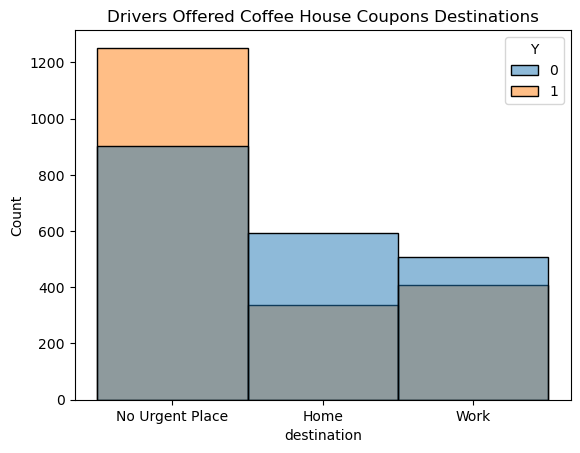

In [42]:
# Let's visualize some of the data.  Where were the driver's headed when the coupon was offered.
plt = sns.histplot(coffee_house_df, x="destination", hue="Y")
plt.set_title("Drivers Offered Coffee House Coupons Destinations")


Text(0.5, 1.0, 'Passengers of Drivers Who Were Offered Coffee House Coupons')

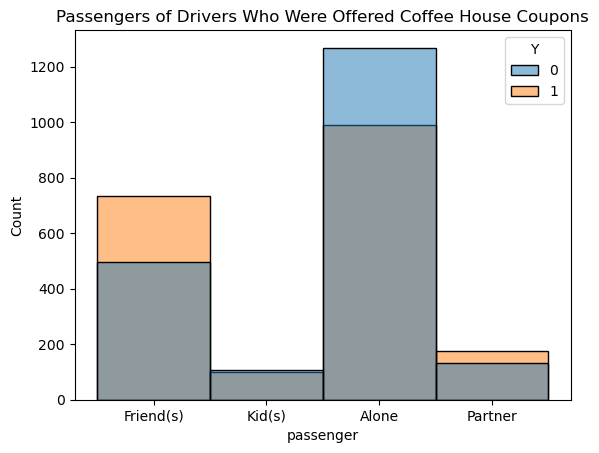

In [19]:
# Who were the passengers of the drivers who accepted coupons?
plt = sns.histplot(coffee_house_df, x="passenger", hue="Y")
plt.set_title("Passengers of Drivers Who Were Offered Coffee House Coupons")

It appears that being alone or with friends account for the most accepted coupons.  When the passengers are friends, the driver accepts more often than not.
Let's look at some statistics of the coffee house coupon group.

In [43]:
# Percentage of accepted coupons that were coffee house
coff_house_total_prop = coffee_house_df.query("Y == 1")["Y"].sum() / data.query("Y == 1")["Y"].sum()
print("Proportion of all accepted coupons: " + str(coff_house_total_prop))

# Percentage of coffee house coupons that were accepted.
coff_house_prop = coffee_house_df.query("Y == 1")["Y"].sum() / coffee_house_df["Y"].size
print("Percentage of coffee house coupons that were accepted: " + str(coff_house_prop))

Proportion of all accepted coupons: 0.2766990291262136
Percentage of coffee house coupons that were accepted: 0.49924924924924924


Nearly 50% of all offered coffee house coupons were accepted.  They also account for ~28% of all accepted coupons.  Let's try and narrow our visualizations
to see if we can find a group with a high acceptance rate.  Let's take a look at the time of day.

Text(0.5, 1.0, 'Time of day of accepted coupons')

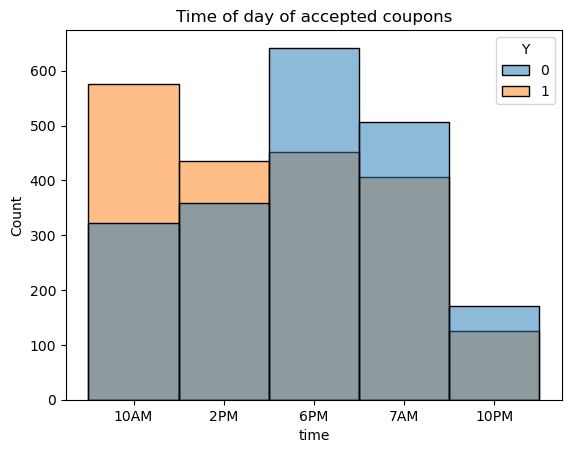

In [21]:
plt = sns.histplot(coffee_house_df, x="time", hue="Y")
plt.set_title("Time of day of accepted coupons")

As we can see in the plot above, accepted coupons occur more around 10a, however, throughout the day coupons are accepted often.  Let's take a look at how the temperature affects acceptance.

Text(0.5, 1.0, 'Affect of temperature on acceptance')

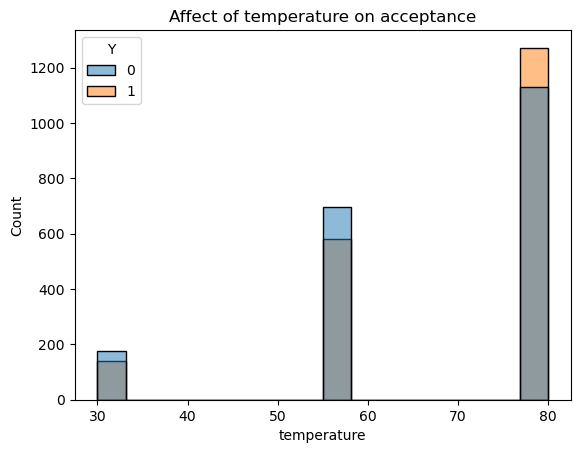

In [22]:
plt = sns.histplot(coffee_house_df, x="temperature", hue="Y")
plt.set_title("Affect of temperature on acceptance")

This is quite interesting.  I would have expected a colder temperature would increase coupon acceptance rate.  It appears that hotter temperatures have a higher acceptance rate.  We need to note that more offers were made when it was warmer.  It doesn't look like looking at the weather will show anything interesting here.  It wouldn't be snowing at 80 degrees F.  Let's see if the driver's gender makes a difference in acceptance.

Text(0.5, 1.0, 'Gender impact on coupon acceptance')

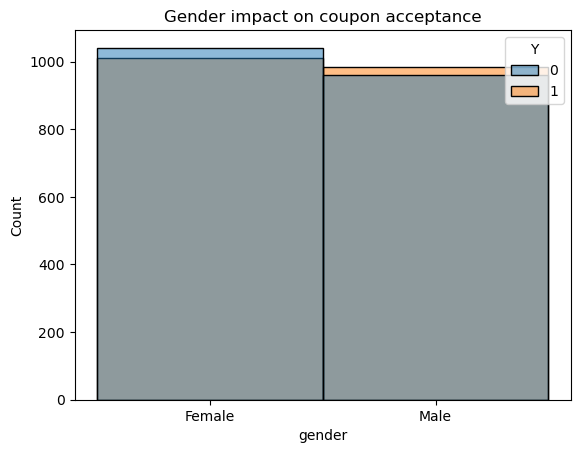

In [23]:
plt = sns.histplot(coffee_house_df, x="gender", hue="Y")
plt.set_title("Gender impact on coupon acceptance")

Gender doesn't look like a model parameter.  The offers and acceptance is a coin toss in the gender variable.  What does it look like with age?

Text(0.5, 1.0, 'Age impacts on acceptance')

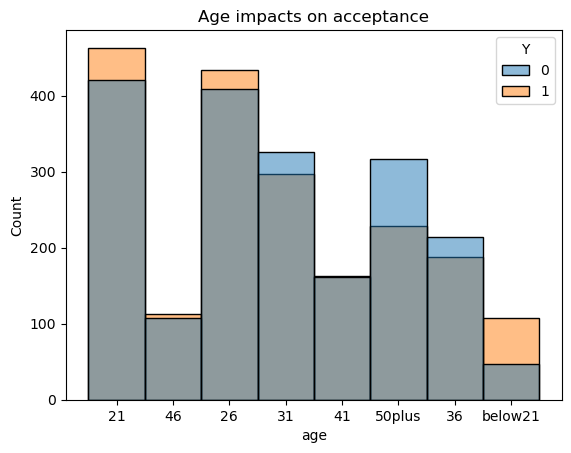

In [24]:
plt = sns.histplot(coffee_house_df, x="age", hue="Y")
plt.set_title("Age impacts on acceptance")

Acceptance rates are higher in the younger age groups.  The model being used looks to use age as it sends coffee house coupons more often to 21, 26, and 31 year old individuals.  Let's combine some of these attributes to determine high acceptance rate groups.

 - Age 31 and younger
 - before 3p
 - with friends

In [45]:
under_32 = ['below21', '21', '26', '31']
before_3p = ['7AM', '10AM', '2PM']
friend_passengers = ['Friend(s)']
query1 = "(age in @under_32) and (time in @before_3p) and (passenger in @friend_passengers)"
prop_young_morn_friends = coffee_house_df.query(query1)["Y"].sum() / coffee_house_df.query(query1)["Y"].size
print('Acceptance rate of under 32, before 3p, and with friends accepted : ' + str(prop_young_morn_friends))

Acceptance rate of under 32, before 3p, and with friends accepted : 0.626465661641541


Young drivers that were offered a coupon in the first half of the day, and with their friends end up accepting the coupon 63% of the time.